# 대선자료시각화

In [1]:
# module
import pandas as pd

In [58]:
# Data 불러오기
election =pd.read_csv("../Data/election_2022.csv")
election.head()

,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정
0,서울특별시,종로구,129968,100629,46130,49172,3115
1,서울특별시,중구,111448,84998,38244,42906,2310
2,서울특별시,용산구,199077,152068,60063,85047,4374
3,서울특별시,성동구,252087,197240,84411,103880,5365
4,서울특별시,광진구,303582,235471,109922,113733,7072


In [6]:
# 기본 통계량 확인하기 : 갯수, 평균, 표준편차, 1~4분위수, 최대값등 
election.describe()

,선거인수,투표수,이재명,윤석열,심상정
count,248.000000,248.000000,248.000000,248.000000,248.000000
mean,176570.540323,136147.838710,64479.104839,65566.290323,3215.532258
std,141049.731983,108569.706317,56875.864428,56766.365763,2893.695797
min,8141.000000,6653.000000,1590.000000,2052.000000,109.000000
25%,47671.500000,39215.750000,17363.000000,18223.000000,709.000000
50%,154353.500000,114654.000000,48797.000000,50341.000000,2617.500000
75%,265099.250000,204189.250000,99830.750000,101949.750000,5041.000000
max,703896.000000,542027.000000,285227.000000,275155.000000,13249.000000


In [9]:
# dimension 확인 
election.shape

(248, 7)

In [10]:
# 컬럼병 자료형 확인
election.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   광역시도    248 non-null    object
 1   시군구     248 non-null    object
 2   선거인수    248 non-null    int64 
 3   투표수     248 non-null    int64 
 4   이재명     248 non-null    int64 
 5   윤석열     248 non-null    int64 
 6   심상정     248 non-null    int64 
dtypes: int64(5), object(2)
memory usage: 13.7+ KB


In [13]:
# 전체컬럼에서 대해 NaN 확인
election.isnull().any()

광역시도    False
시군구     False
선거인수    False
투표수     False
이재명     False
윤석열     False
심상정     False
dtype: bool

In [59]:
election['electionSum']= election[['이재명','윤석열','심상정']].sum(axis=1)
election.head()

,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electionSum
0,서울특별시,종로구,129968,100629,46130,49172,3115,98417
1,서울특별시,중구,111448,84998,38244,42906,2310,83460
2,서울특별시,용산구,199077,152068,60063,85047,4374,149484
3,서울특별시,성동구,252087,197240,84411,103880,5365,193656
4,서울특별시,광진구,303582,235471,109922,113733,7072,230727


In [60]:
# 전체 투표율 구하기 
election['electionRatio']=round((election.electionSum /election.투표수) *100,2)
election.head()

,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electionSum,electionRatio
0,서울특별시,종로구,129968,100629,46130,49172,3115,98417,97.80
1,서울특별시,중구,111448,84998,38244,42906,2310,83460,98.19
2,서울특별시,용산구,199077,152068,60063,85047,4374,149484,98.30
3,서울특별시,성동구,252087,197240,84411,103880,5365,193656,98.18
4,서울특별시,광진구,303582,235471,109922,113733,7072,230727,97.99


In [19]:
# csv 로 저장하기 
election.to_csv("../Data/election_2022_new.csv",index=False)

---
### 광역시별 투표율을 Pie chart로 표현하기 

In [121]:
election

,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electionSum,electionRatio
0,서울특별시,종로구,129968,100629,46130,49172,3115,98417,97.80
1,서울특별시,중구,111448,84998,38244,42906,2310,83460,98.19
2,서울특별시,용산구,199077,152068,60063,85047,4374,149484,98.30
3,서울특별시,성동구,252087,197240,84411,103880,5365,193656,98.18
4,서울특별시,광진구,303582,235471,109922,113733,7072,230727,97.99
...,...,...,...,...,...,...,...,...,...
243,경상남도,산청군,31645,24913,7125,16607,464,24196,97.12
244,경상남도,거창군,53049,41399,11963,27254,895,40112,96.89
245,경상남도,합천군,39768,31270,6911,22742,511,30164,96.46
246,제주특별자치도,제주시,408552,296826,157695,122084,10007,289786,97.63


In [122]:
table = election.pivot_table('투표수',index=['광역시도'],
aggfunc=sum   
) 
table


,투표수
광역시도,
강원도,1015458
경기도,8518854
경상남도,2146882
경상북도,1774284
광주광역시,985492
대구광역시,1611512
대전광역시,945308
부산광역시,2200224
서울특별시,6501831


In [123]:
table2 = table.sort_values(by='투표수',ascending=False)
table2.head()

,투표수
광역시도,
경기도,8518854
서울특별시,6501831
부산광역시,2200224
경상남도,2146882
인천광역시,1883504


In [124]:
# ratio 컬럼 추가 
table['ratio'] = round(table.투표수 / table.투표수.sum()*100,2)
table

,투표수,ratio
광역시도,,
강원도,1015458,3.01
경기도,8518854,25.23
경상남도,2146882,6.36
경상북도,1774284,5.25
광주광역시,985492,2.92
대구광역시,1611512,4.77
대전광역시,945308,2.80
부산광역시,2200224,6.52
서울특별시,6501831,19.26


In [111]:
import matplotlib.pyplot as plt

In [144]:
plt.style.use("default")

In [146]:
# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

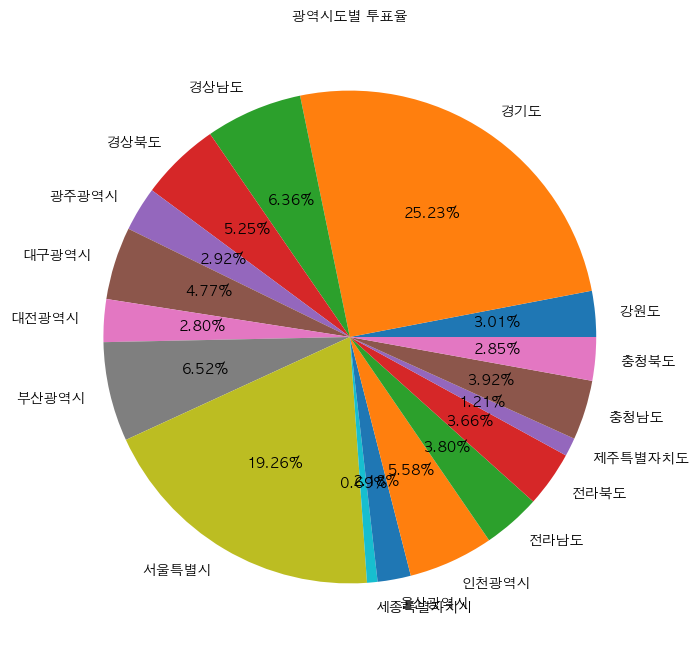

In [147]:
data = table['ratio']
categories = list(table.index)
#
plt.rcParams['figure.figsize'] = (8,8)
plt.rcParams['font.size'] = 10
plt.pie(
    data,
    labels = categories,
    autopct = "%.2f%%"
)
plt.title("광역시도별 투표율",fontsize = 10)
plt.show()


In [129]:
# 윤석열 후보의 광역시도별 득표율 구하기
yun_table = election.pivot_table('윤석열',index=['광역시도'],
aggfunc=sum   
) 
yun_table

,윤석열
광역시도,
강원도,544980
경기도,3859666
경상남도,1237346
경상북도,1278922
광주광역시,124511
대구광역시,1199888
대전광역시,464060
부산광역시,1270072
서울특별시,3255747


In [131]:
# 내림차순 투표수 정렬
yun_table = yun_table.sort_values(by='윤석열',ascending=False)
yun_table.head()

,윤석열
광역시도,
경기도,3859666
서울특별시,3255747
경상북도,1278922
부산광역시,1270072
경상남도,1237346


In [132]:
# 투표율 컬럼
yun_table['ratio'] = round(yun_table.윤석열 / yun_table.윤석열.sum()*100,2)
yun_table

,윤석열,ratio
광역시도,,
경기도,3859666,23.74
서울특별시,3255747,20.02
경상북도,1278922,7.87
부산광역시,1270072,7.81
경상남도,1237346,7.61
대구광역시,1199888,7.38
인천광역시,878560,5.40
충청남도,670283,4.12
강원도,544980,3.35


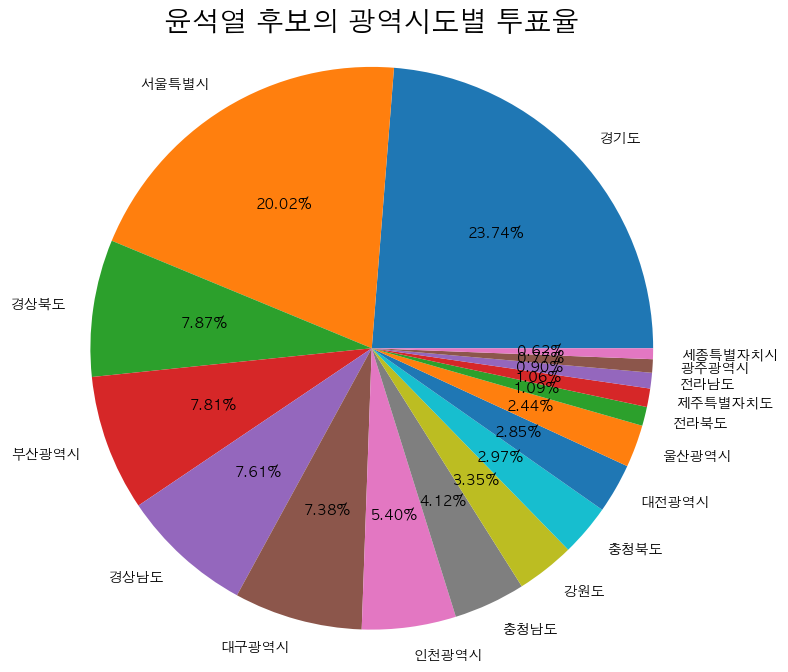

In [153]:
data = yun_table['ratio']
categories = list(yun_table.index)
#
plt.rcParams['figure.figsize'] = (8,8)
plt.rcParams['font.size'] = 10
plt.pie(
    data,
    labels = categories,
    autopct = "%.2f%%",
    startangle=0,
)
plt.title("윤석열 후보의 광역시도별 투표율",fontsize = 20)
plt.axis("equal")   #차트 가운데로  균등하게 들어감
plt.show()

In [214]:
# 윤석열 후보의 서울 득표 top 5

In [228]:
yun_seoul = election[election.광역시도 == '서울특별시'].pivot_table('윤석열',index=['시군구'],
aggfunc=sum   
) 
yun_seoul.head()

,윤석열
시군구,
강남구,235897
강동구,160593
강북구,86540
강서구,181510
관악구,151944


In [229]:
# 정렬
yun_seoul = yun_seoul.sort_values(by='윤석열',ascending=False)

In [230]:
# 나머지를 기타로 묶기
etc=yun_seoul.iloc[5:].sum()

In [231]:
# 5개만 자르기 
yun_seoul2 = yun_seoul.head()
yun_seoul2

,윤석열
시군구,
송파구,255166
강남구,235897
강서구,181510
서초구,179472
노원구,163340


In [233]:
# 기타 넣기 
yun_seoul2.loc['기타'] =etc
yun_seoul2

/Users/tj/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


,윤석열
시군구,
송파구,255166
강남구,235897
강서구,181510
서초구,179472
노원구,163340
기타,2240362


In [234]:
# 투표율 구하기
yun_seoul2['ratio'] = round(yun_seoul2.윤석열 / yun_seoul2.윤석열.sum()*100,2)
yun_seoul2


/var/folders/_z/5lt5f71x2fq6j9898gb_0m000000gn/T/ipykernel_3141/1532316752.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yun_seoul2['ratio'] = round(yun_seoul2.윤석열 / yun_seoul2.윤석열.sum()*100,2)


,윤석열,ratio
시군구,,
송파구,255166,7.84
강남구,235897,7.25
강서구,181510,5.58
서초구,179472,5.51
노원구,163340,5.02
기타,2240362,68.81


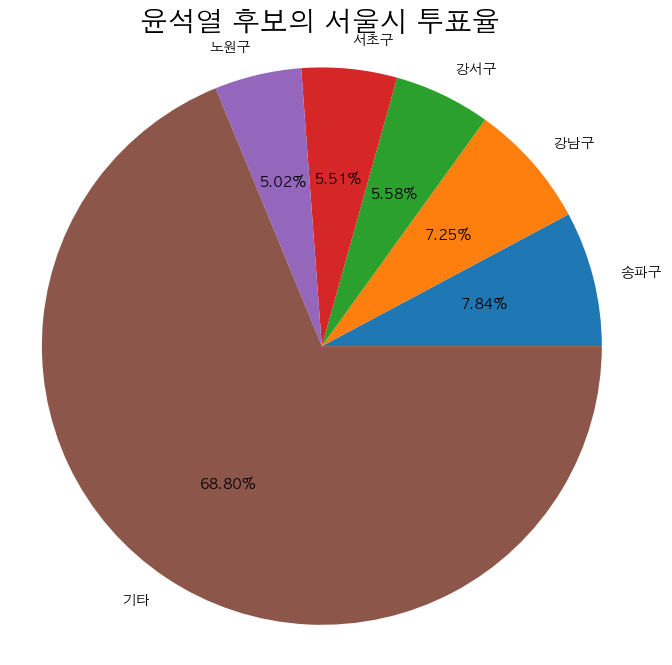

In [261]:
data = yun_seoul2['ratio']
categories = list(yun_seoul2.index)
#
plt.rcParams['figure.figsize'] = (8,8)
plt.rcParams['font.size'] = 10
plt.pie(
    data,
    labels = categories,
    autopct = "%.2f%%",
    startangle=0,
)
plt.title("윤석열 후보의 서울시 투표율",fontsize = 20)
plt.axis("equal")   #차트 가운데로  균등하게 들어감
plt.show()

In [255]:
plt.style.use

<function matplotlib.style.core.use(style)>